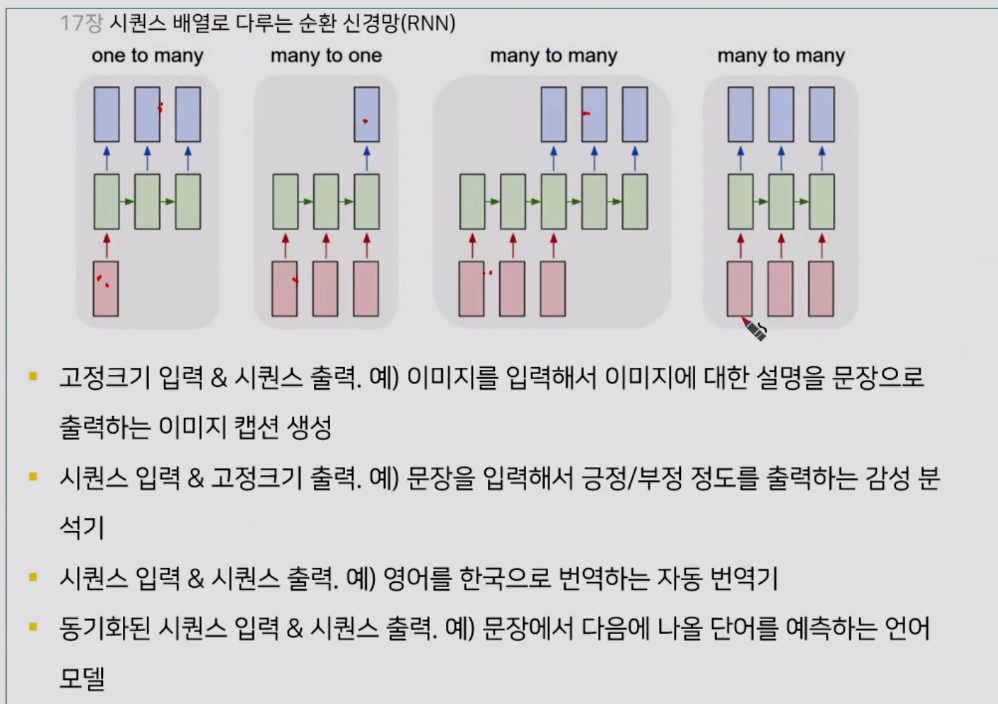

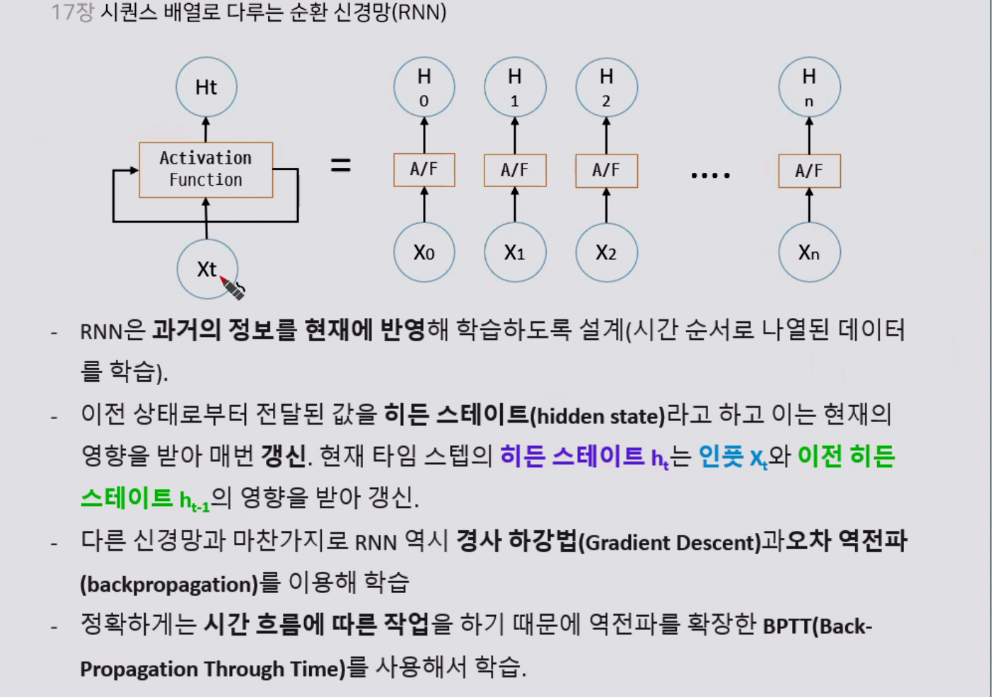

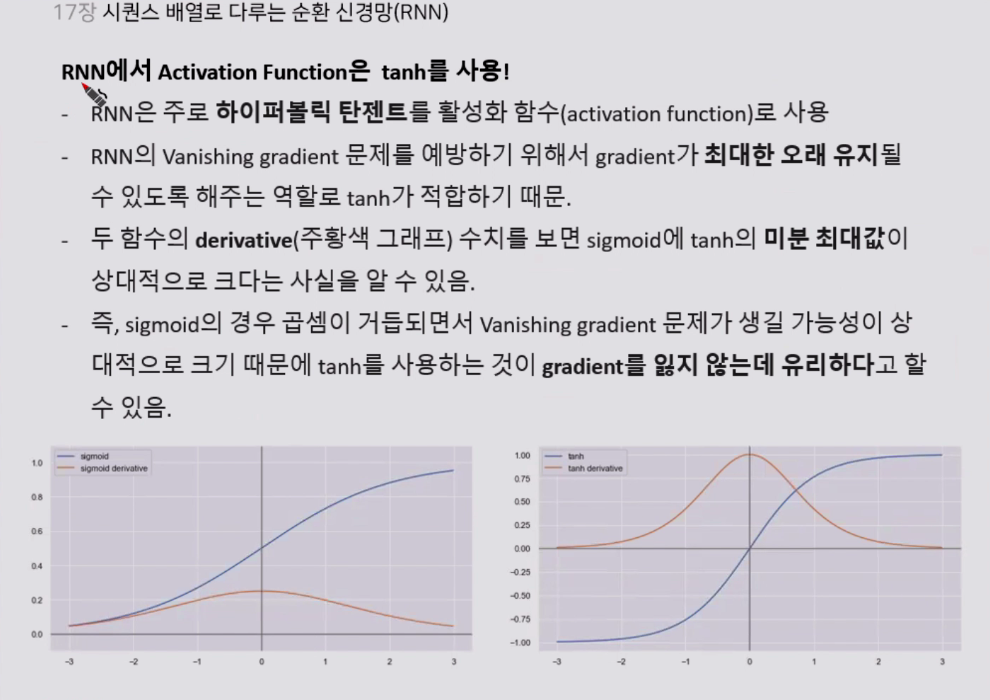m

In [7]:
import numpy 
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import reuters

np.random.seed(0)
tf.random.set_seed(0)

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


In [9]:
category = np.max(y_train) + 1
print(category, '카테고리')
print(x_train[0], y_train[0])

46 카테고리
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12] 3


In [12]:
word_to_index = reuters.get_word_index()
print(word_to_index)

557056/550378 [==============================] - 0s 0us/step
{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 162

In [13]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

print(''.join([index_to_word[x] for x in x_train[0]]))

theofofmlnlossforplcsaidatonlyendedsaidofcould1tradersnowapril0aaftersaidfrom1985andfromforeign000april0pricesitsaccountyearabutinthismlnhomeanstatesearlierandriseandrevsvs000its16vs000abut3ofofseveralandshareholdersanddividendvs000itsall4vs0001mlnagreedofapril0are2stateswillbilliontotalandagainst000pctdlrs


각 기사의 단어 수가 제각각 다르므로 단어의 숫자를 맞춰야 함 데이터 전처리로

In [15]:
from tensorflow.keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=100)  # 단어수를 100으로 맞춰라 그리고 크면 버림, 모라잘땐 0으로 채움
x_test = sequence.pad_sequences(x_test, maxlen=100)

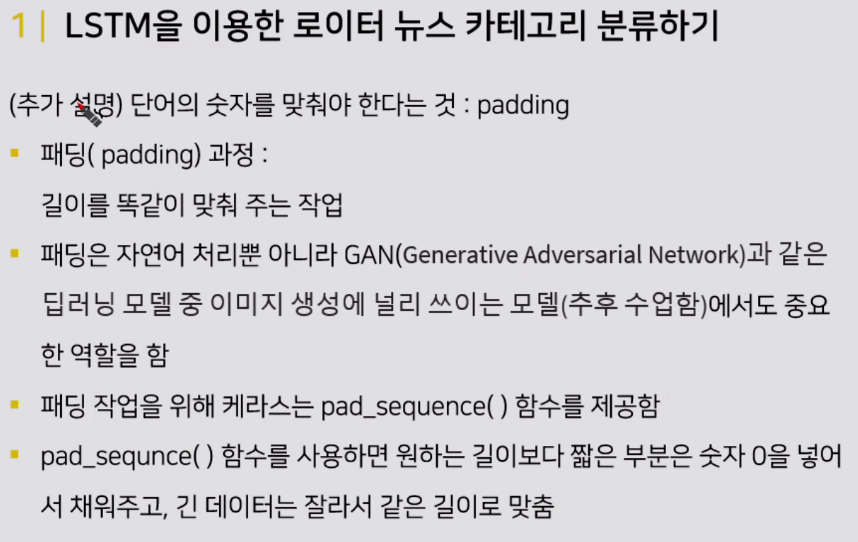

In [16]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   2,   2,   8,  43,  10, 447,   5,  25, 207, 270,   5,   2,
       111,  16, 369, 186,  90,  67,   7,  89,   5,  19, 102,   6,  19,
       124,  15,  90,  67,  84,  22, 482,  26,   7,  48,   4,  49,   8,
       864,  39, 209, 154,   6, 151,   6,  83,  11,  15,  22, 155,  11,
        15,   7,  48,   9,   2,   2, 504,   6, 258,   6, 272,  11,  15,
        22, 134,  44,  11,  15,  16,   8, 197,   2,  90,  67,  52,  29,
       209,  30,  32, 132,   6, 109,  15,  17,  12])

In [18]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test,y_test))

print("%.4f : %.4f" %(model.evaluate(x_train,y_train)[1], model.evaluate(x_test,y_test)[1]))

Epoch 1/20
90/90 [==============================] - 8s 94ms/step - loss: 2.5634 - accuracy: 0.3656 - val_loss: 2.1684 - val_accuracy: 0.4893
Epoch 2/20
90/90 [==============================] - 6s 71ms/step - loss: 2.0414 - accuracy: 0.4971 - val_loss: 1.9924 - val_accuracy: 0.5151
Epoch 3/20
90/90 [==============================] - 7s 76ms/step - loss: 1.9525 - accuracy: 0.5075 - val_loss: 2.0459 - val_accuracy: 0.4782
Epoch 4/20
90/90 [==============================] - 7s 75ms/step - loss: 1.9169 - accuracy: 0.5188 - val_loss: 1.9354 - val_accuracy: 0.5214
Epoch 5/20
90/90 [==============================] - 7s 78ms/step - loss: 1.7552 - accuracy: 0.5560 - val_loss: 1.7223 - val_accuracy: 0.5623
Epoch 6/20
90/90 [==============================] - 7s 75ms/step - loss: 1.6557 - accuracy: 0.5770 - val_loss: 1.6900 - val_accuracy: 0.5824
Epoch 7/20
90/90 [==============================] - 7s 75ms/step - loss: 1.6140 - accuracy: 0.5851 - val_loss: 1.6780 - val_accuracy: 0.5761
Epoch 8/20
90